<a href="https://colab.research.google.com/github/eryyyj/Machine_Learning/blob/main/Midterms/HOA5.1/PISALBON_Hands_on_Activity_3_2_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 3.1 Decision Tree

Objective(s):

This activity aims to perform classification using Decision Tree

Intended Learning Outcomes (ILOs):
* Demonstrate how to build the model using Decision Tree.
* Demonstrate how to evaluate the performance of the model.
* Demonstrate how to create tree visualization of the model.

Resources:
* Jupyter Notebook
* kyphosis

Procedure:

Import the libraries

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and check the content of the dataframe using Pandas

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Check the pairplot of the data

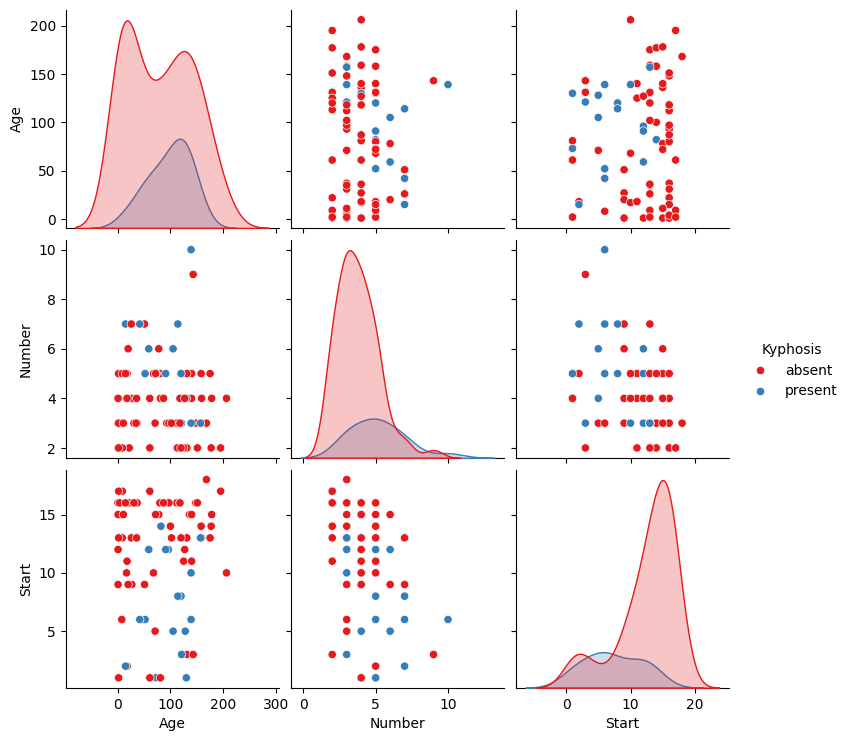

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

Interpret the result of the pairplot

My Interpretation of the pairplot on kyphosis are ages of people without kyphosis shows a bimodal distribution and while the people that has present kyphosis has a uniform spread compared to the absent, and the people on the dataset overlaps in every variable but on the distribution on the Age shows a negative skew (most of the values in our dataset are found on the right side)

Build the model using Decision Tree

Split the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train a single decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Determine how many nodes are present and what the depth of this (very large) tree is.

The number of nodes and the maximum actual depth.

In [ ]:
dtree.tree_.node_count, dtree.tree_.max_depth

(23, 6)

Predict and evaluate the model

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
#evaluate the performance using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.95      0.82      0.88        22
     present       0.33      0.67      0.44         3

    accuracy                           0.80        25
   macro avg       0.64      0.74      0.66        25
weighted avg       0.87      0.80      0.83        25



Interpret the precision, recall and f1-score

My interpretation on the precision, recall, and f1-score are 95% of dataset that the model predicted as absent are correct and the model correctly identified of the actual absent cases while 67% that the model predicted as present are correct and the model correctly identified of the actual present cases, and the f1-score on both targets indicates that there a strong balance between of precision and recall on absent cases while on the present cases indicates a lower balance <br> <br>

the model on absent performs well in all catergories having a high score on precision, recall, and f1-score compared to the present who performed pretty bad

In [ ]:
#evaluate the performance using confusion matrix
print(confusion_matrix(y_test,predictions))

[[18  4]
 [ 1  2]]


Interpret the performance using classification matrix

My interpretation on the the classifcation matrix of the model indicates that 5 datapoints that were misidentified by the model. The model performed pretty bad on classifying the present type but performed well in classifying the absent type with only having 1 misclassification

In [ ]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.8


Interpret the performance of the model using accuracy score

My interpratation on the accuracy of the model is that the model we made is a not a good model because it did not meet the accuracy value requirement of .95, after the model classified the datapoints it only classified 80% of the dataset correctly while 20% of it were misclassified by the model

Create a tree visualization of the model

In [ ]:
pip install six

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

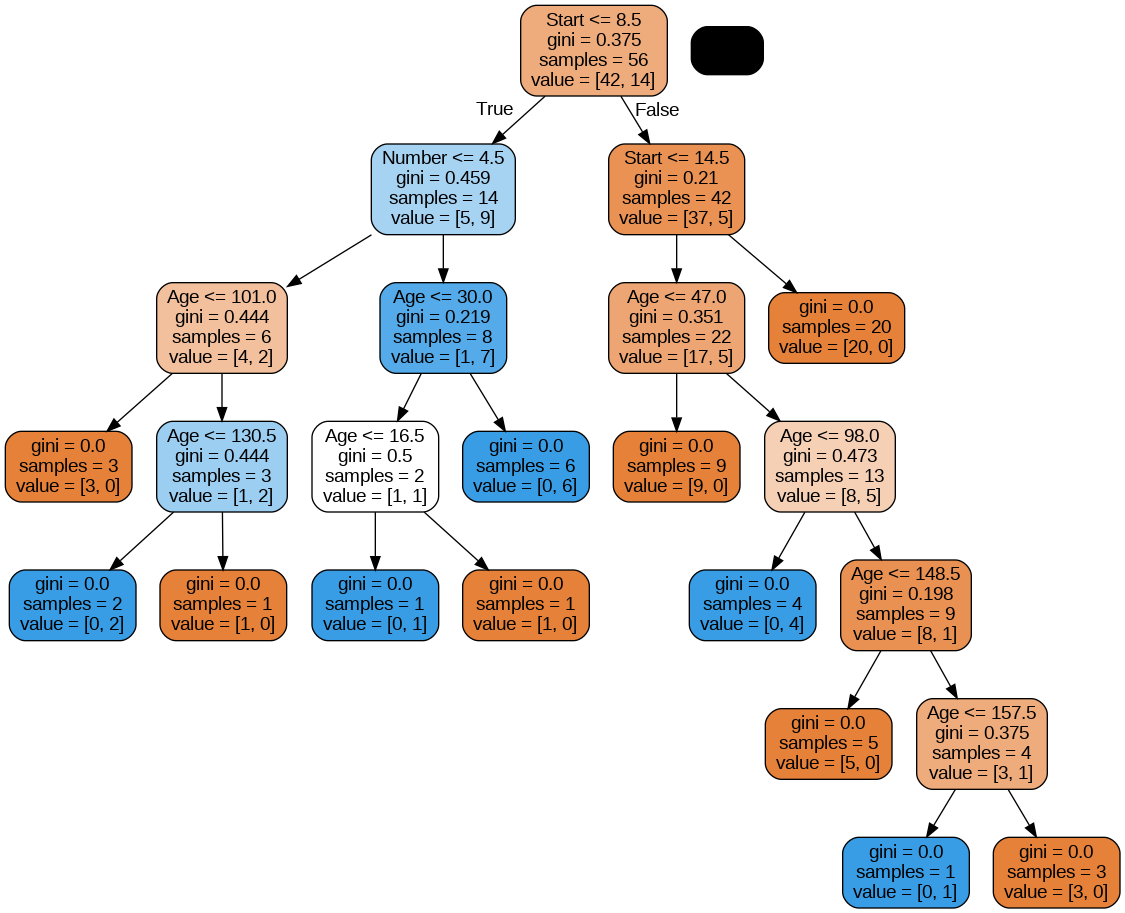

In [ ]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'kyphosis .png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Build the model using Decision Tree
* Evaluate the model using classification report, accuracy and confusion matrix
* Create a tree visualization of the model

In [ ]:
# importing my data set
gcdf = pd.read_csv('/content/drive/MyDrive/DATASETS/GenderClassification_UsingHWShoesize.csv')
gcdf.head()

,Hight,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [ ]:
# Determine the number of datapoints, columns and data types
gcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hight      109 non-null    int64  
 1   Weight     109 non-null    float64
 2   Shoe size  109 non-null    int64  
 3   Gender     109 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [ ]:
print("number of records: ", len(gcdf))
print("number of columns: ", len(gcdf.columns))

number of records:  109
number of columns:  4


In [ ]:
# Remove unneccesary columns
# Do data cleaning such as removing empty values(NaN), replacing missing data .

gcdf.isnull().sum()

,0
Hight,0
Weight,0
Shoe size,0
Gender,0


In [ ]:
# renaming the type on the column name

gcdf.rename(columns={'Hight':'Height','Shoe size':'Shoe_size'}, inplace=True)

In [ ]:
# checking if the renaming is successful

gcdf.head()

,Height,Weight,Shoe_size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [ ]:
#replacing Gender column to binary
gcdf['Gender'] = gcdf['Gender'].replace({'M': 1, 'F': 0})
gcdf.head()

<ipython-input-10-8bd4a6771023>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gcdf['Gender'] = gcdf['Gender'].replace({'M': 1, 'F': 0})


,Height,Weight,Shoe_size,Gender
0,180,79.0,42,1
1,165,65.0,41,1
2,178,72.0,42,1
3,160,53.0,43,1
4,182,78.0,36,1


In [ ]:
# Perform descriptive statistics such as mean, median and mode
gcdf_meanMed = gcdf.describe().loc[['mean','50%']]
gcdf_meanMed.rename(index={'50%':'median'},inplace = True)
gcdf_meanMed.head()

,Height,Weight,Shoe_size,Gender
mean,173.40367,95.887156,40.743119,0.550459
median,174.00000,95.000000,41.000000,1.000000


In [ ]:
mode = gcdf.mode().loc[0]
mode = pd.DataFrame(mode).T
mode.rename(index={0:'mode'},inplace = True)
mode.head()

,Height,Weight,Shoe_size,Gender
mode,172.0,110.0,42.0,1.0


In [ ]:
gcdf_statdesc = pd.concat([gcdf_meanMed,mode])
gcdf_statdesc.fillna('-',inplace=True)
gcdf_statdesc

,Height,Weight,Shoe_size,Gender
mean,173.40367,95.887156,40.743119,0.550459
median,174.00000,95.000000,41.000000,1.000000
mode,172.00000,110.000000,42.000000,1.000000


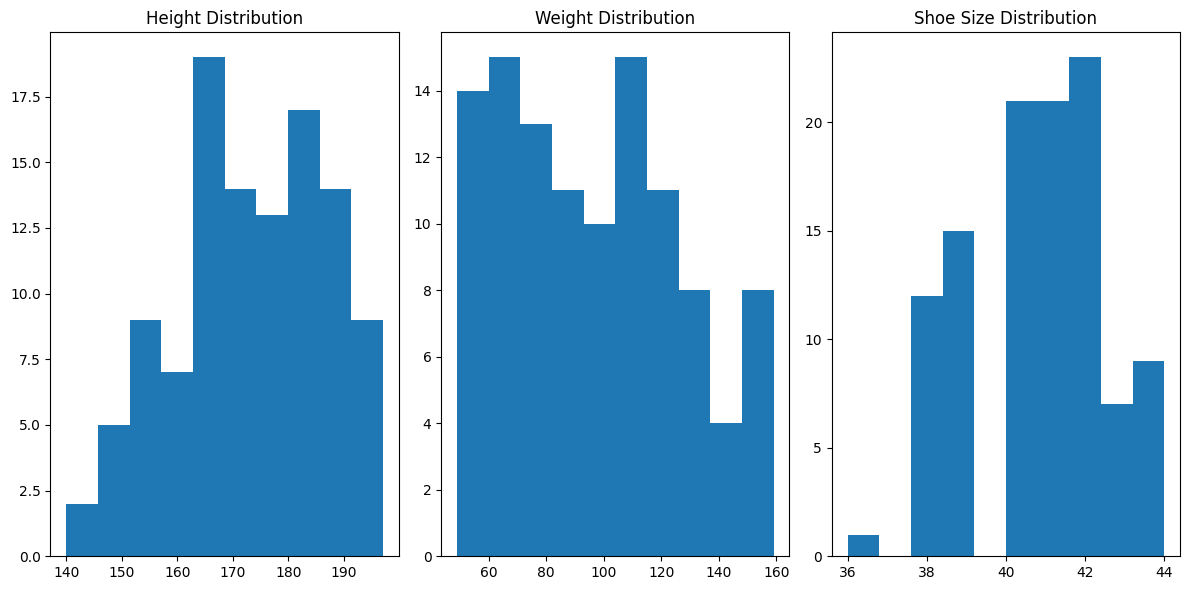

Text(0.5, 1.0, 'Correlation Matrix')

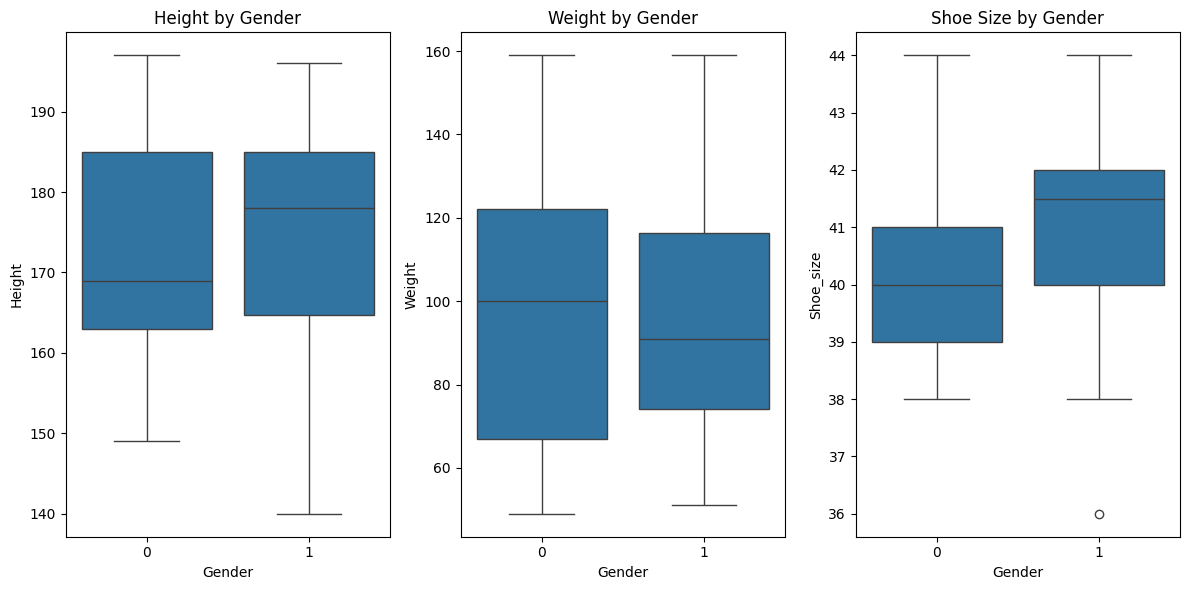

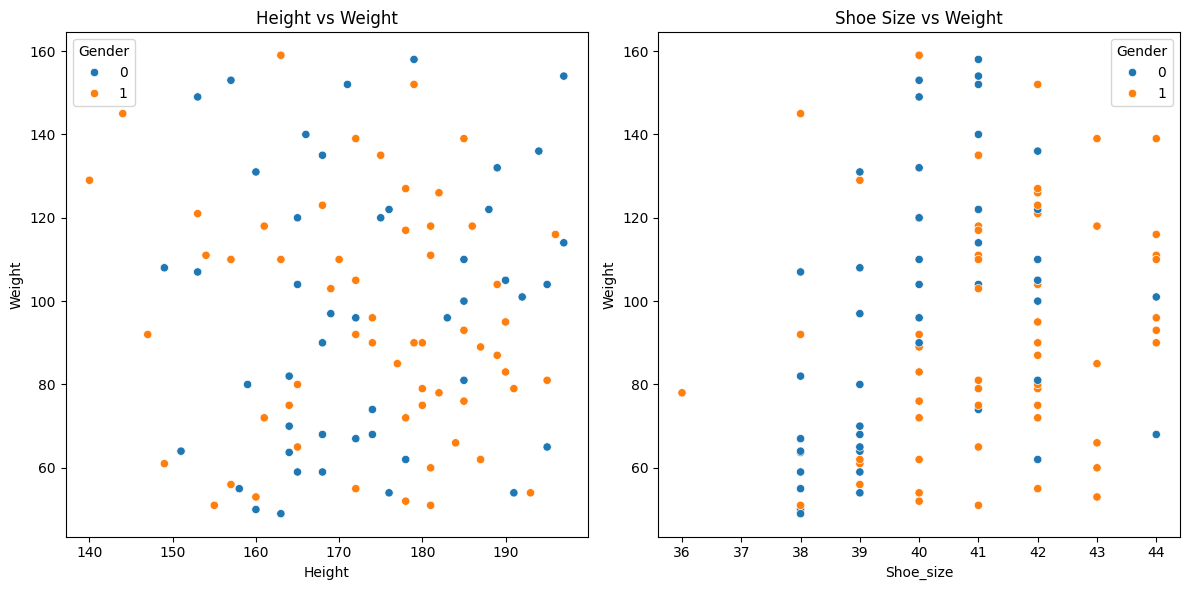

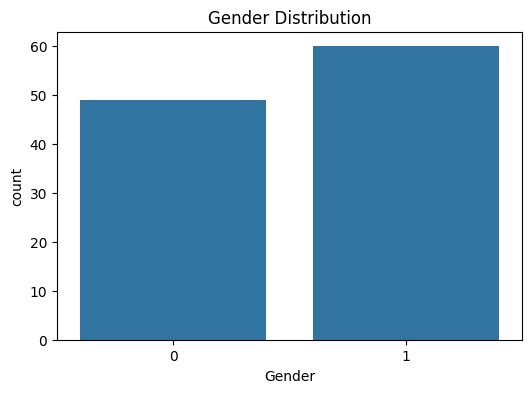

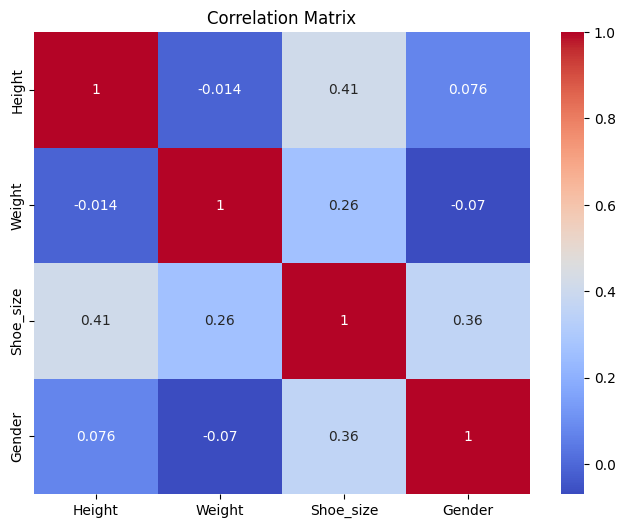

In [ ]:
# Performing data visualization on gcdf dataframe
# Histogram for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(gcdf['Height'], bins=10)
plt.title('Height Distribution')

plt.subplot(1, 3, 2)
plt.hist(gcdf['Weight'], bins=10)
plt.title('Weight Distribution')

plt.subplot(1, 3, 3)
plt.hist(gcdf['Shoe_size'], bins=10)
plt.title('Shoe Size Distribution')
plt.tight_layout()
plt.show()

# Boxplot for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Height', data=gcdf)
plt.title('Height by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Weight', data=gcdf)
plt.title('Weight by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Shoe_size', data=gcdf)
plt.title('Shoe Size by Gender')
plt.tight_layout()


# Scatter plot for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=gcdf)
plt.title('Height vs Weight')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Shoe_size', y='Weight', hue='Gender', data=gcdf)
plt.title('Shoe Size vs Weight')
plt.tight_layout()

# Count plot for categorical feature
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=gcdf)
plt.title('Gender Distribution')

# Correlation matrix heatmap
correlation_matrix = gcdf.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [ ]:
#Building the model using Decision Tree

X_gc = gcdf.drop('Gender',axis=1)
y_gc = gcdf['Gender']

In [ ]:
X_gc.head() #checking

,Height,Weight,Shoe_size
0,180,79.0,42
1,165,65.0,41
2,178,72.0,42
3,160,53.0,43
4,182,78.0,36


In [ ]:
y_gc.head() #checking

,Gender
0,1
1,1
2,1
3,1
4,1


In [ ]:
X_train_gc, X_test_gc, y_train_gc, y_test_gc = train_test_split(X_gc, y_gc, test_size=0.30)

In [ ]:
# making a model and training the model of my dataseyt
dtree_gc = DecisionTreeClassifier()
dtree_gc.fit(X_train_gc,y_train_gc)

DecisionTreeClassifier()

In [ ]:
predict_gc = dtree_gc.predict(X_test_gc)

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Build the model using Decision Tree
* Evaluate the model using classification report, accuracy and confusion matrix
* Create a tree visualization of the model

In [ ]:
print('Classification Report')
print(classification_report(y_test_gc,predict_gc))

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.62      0.76      0.68        17

    accuracy                           0.64        33
   macro avg       0.64      0.63      0.63        33
weighted avg       0.64      0.64      0.63        33



In [ ]:
print('accuracy')
print(accuracy_score(y_test_gc,predict_gc))

accuracy
0.6363636363636364


In [ ]:
predict_train = dtree_gc.predict(X_train_gc)
print(accuracy_score(y_train_gc,predict_train))

1.0


In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features_gc = list(gcdf.columns[:-1])
features_gc

['Height', 'Weight', 'Shoe_size']

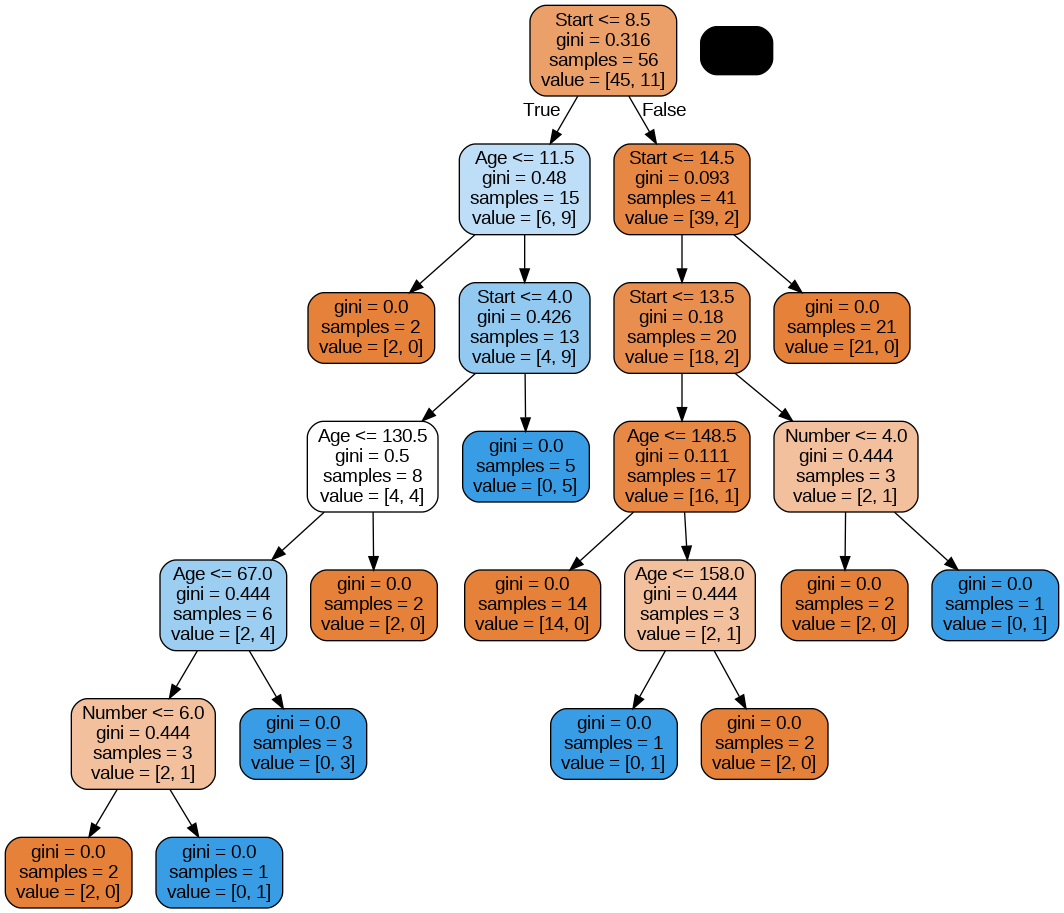

In [ ]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree_gc, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'GenderClassification.png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

Conclusion

After doing the HOA today I concluded decision trees is a useful and intuitive tool for our classification dataset problem. I observed that having a low relationship on the data set can lead to lower performance of our model but there are ways to obtain a good accuracy because in my supplementary activity, all the columns in my dataset mostly has a weak relationship, and those weak relationship on my columns leads to a bad performance of my model which only have a .63 accuracy score and lastly the model overfits because the testing accuracy is lower than the training accuracy